In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
from scipy.stats import norm

In [6]:
ALPHA = 0.05
RANDOM_SEED = 42

In [7]:
df = pd.read_csv('data/movies_data.csv')

df

,Series_Title,Released_Year,Certificate,Runtime,Genre,Subgenre,Subgenre 1,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,NaN,NaN,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175,Crime,Drama,NaN,9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152,Action,Crime,Drama,9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202,Crime,Drama,NaN,9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96,Crime,Drama,NaN,9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115,Comedy,Drama,Romance,7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201,Drama,Western,NaN,7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,Passed,118,Drama,Romance,War,7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,Lifeboat,1944,NaN,97,Drama,War,NaN,7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


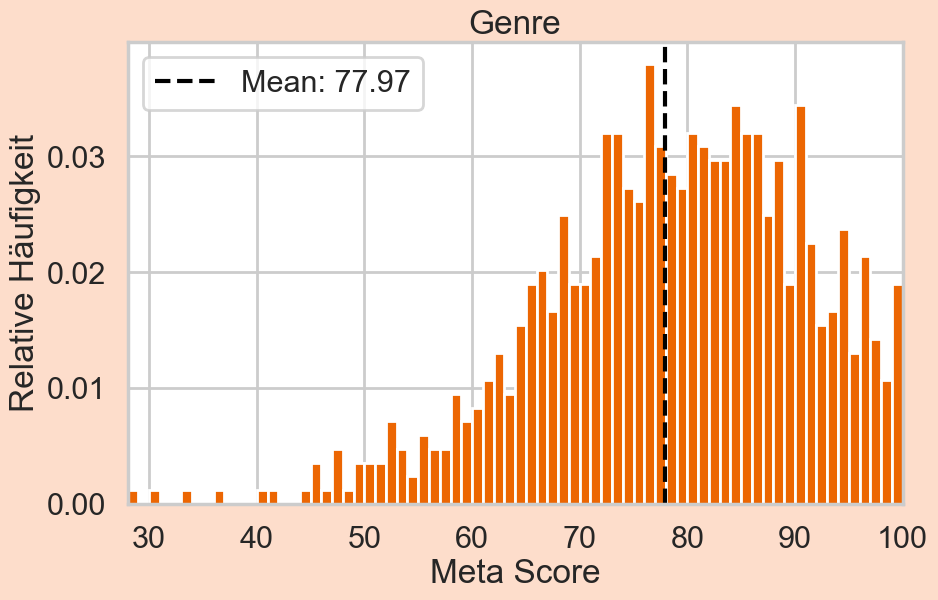

In [8]:
sns.set_style('whitegrid')
sns.set_context('poster')
plt.figure(figsize=(10, 6), facecolor='#fdddcb')
plt.hist(df.Meta_score, bins=range(int(df.Meta_score.min()), int(df.Meta_score.max()) + 1), color='#EC6602', 
         density=True)
genre_mean = df.Meta_score.mean()
plt.axvline(x=genre_mean, color='black', label=f'Mean: {genre_mean:.2f}', linestyle='--')
plt.xlabel('Meta Score')
plt.ylabel('Relative Häufigkeit')
plt.title('Genre')
plt.legend()
plt.xlim(int(df.Meta_score.min()), 100)
plt.show()

In [9]:
df_pivoted_meta = df.pivot_table(index='Genre', values='Meta_score', aggfunc=['mean', 'count', 'median', 'std', 'min', 'max'])

df_pivoted_meta.sort_values(('mean', 'Meta_score'), ascending=False)

,mean,count,median,std,min,max
,Meta_score,Meta_score,Meta_score,Meta_score,Meta_score,Meta_score
Genre,,,,,,
Film-Noir,95.666667,3,96.0,1.527525,94.0,97.0
Animation,81.093333,75,82.0,8.813646,61.0,96.0
Thriller,81.000000,1,81.0,NaN,81.0,81.0
Horror,80.000000,11,87.0,15.362291,46.0,97.0
Drama,79.701245,241,82.0,12.744687,28.0,100.0
Mystery,79.125000,8,77.0,18.604435,52.0,100.0
Family,79.000000,2,79.0,16.970563,67.0,91.0
Comedy,78.720000,125,79.0,11.829160,45.0,99.0


In [10]:
df_filtered_drama = df[df['Genre'] == 'Drama']['Meta_score']
df_filtered_drama = df_filtered_drama[~df_filtered_drama.isna()]
df_filtered_action = df[df['Genre'] == 'Action']['Meta_score']
df_filtered_action = df_filtered_action[~df_filtered_action.isna()]
df_filtered_action = df_filtered_action.astype('int')
df_filtered_drama = df_filtered_drama.astype('int')

In [11]:
min_action = df_filtered_action.min()
max_action = df_filtered_action.max()
mean_action = df_filtered_action.mean()
std_action = df_filtered_action.std()
min_drama = df_filtered_drama.min()
max_drama = df_filtered_action.max()
mean_drama = df_filtered_drama.mean()
std_drama = df_filtered_drama.std()

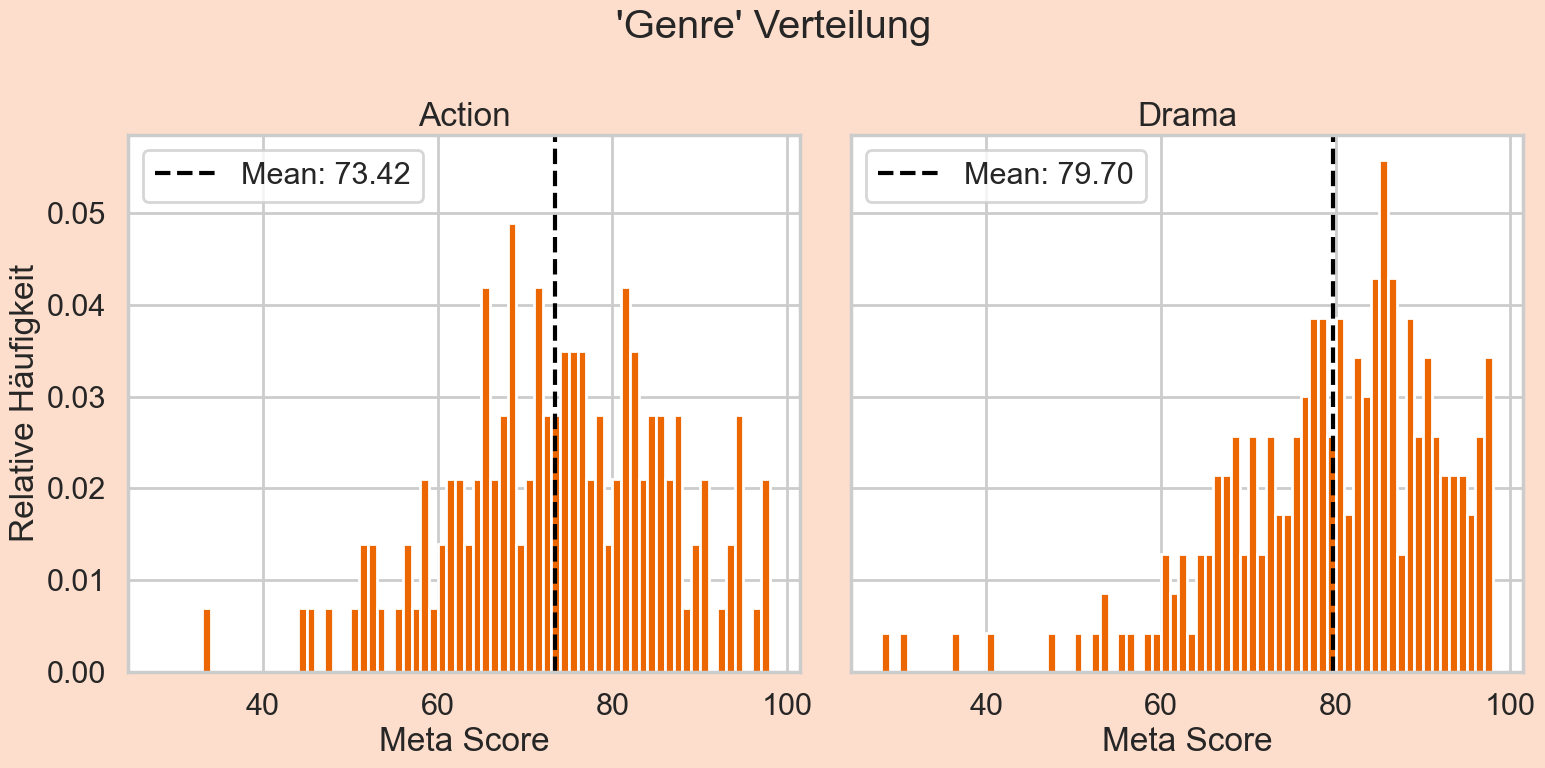

In [12]:
sns.set_style('whitegrid')
sns.set_context('poster')
fig, ax = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True, facecolor='#fdddcb')

ax[0].hist(df_filtered_action, bins=range(min_action, max_action + 1), color='#EC6602', density=True)
ax[0].axvline(x=mean_action, color='black', linestyle='--', label=f"Mean: {mean_action:.2f}")
ax[0].set_title('Action')
ax[0].set_xlabel('Meta Score')
ax[0].set_ylabel('Relative Häufigkeit')
ax[0].legend()
ax[1].hist(df_filtered_drama, bins=range(min_drama, max_drama + 1), color='#EC6602', density=True)
ax[1].axvline(x=mean_drama, color='black', linestyle='--', label=f"Mean: {mean_drama:.2f}")
ax[1].set_title('Drama')
ax[1].set_xlabel('Meta Score')
ax[1].legend()
plt.suptitle("'Genre' Verteilung")
plt.tight_layout()
plt.show()

In [13]:
n_action = 78
n_drama = 81
df_action_stichprobe = df_filtered_action.sample(n_action, random_state=RANDOM_SEED)
df_drama_stichprobe = df_filtered_drama.sample(n_drama, random_state=RANDOM_SEED)
std_stichprobe_action = df_action_stichprobe.std() * (n_action / (n_action - 1))**0.5
std_stichprobe_drama = df_drama_stichprobe.std() * (n_drama / (n_drama - 1))**0.5
mean_stichprobe_action = df_action_stichprobe.mean()
mean_stichprobe_drama = df_drama_stichprobe.mean()
std_fehler_drama = std_stichprobe_drama / n_drama**0.5

print(f"Std. 'Action' Stichprobe: {std_stichprobe_action:.2f}\nStd. 'Drama' Stichprobe: {std_stichprobe_drama:.2f}\n\
Mean 'Action' Stichprobe: {mean_stichprobe_action:.2f}\nMean 'Drama' Sitchprobe: {mean_stichprobe_drama:.2f}\n\
Standard Fehler 'Drama' Stichprobe: {std_fehler_drama:.2f}")

Std. 'Action' Stichprobe: 12.49
Std. 'Drama' Stichprobe: 15.20
Mean 'Action' Stichprobe: 72.47
Mean 'Drama' Sitchprobe: 79.27
Standard Fehler 'Drama' Stichprobe: 1.69


In [14]:
t_wert, p_wert = ttest_ind(df_action_stichprobe, df_drama_stichprobe, equal_var=False)

print(f"t-Wert: {t_wert:.2f}\np-Wert: {p_wert*100:.2f}%")

if p_wert < ALPHA:
    print("**POSITIV**")
else:
    print("**NEGATIV**")

t-Wert: -3.10
p-Wert: 0.23%
**POSITIV**


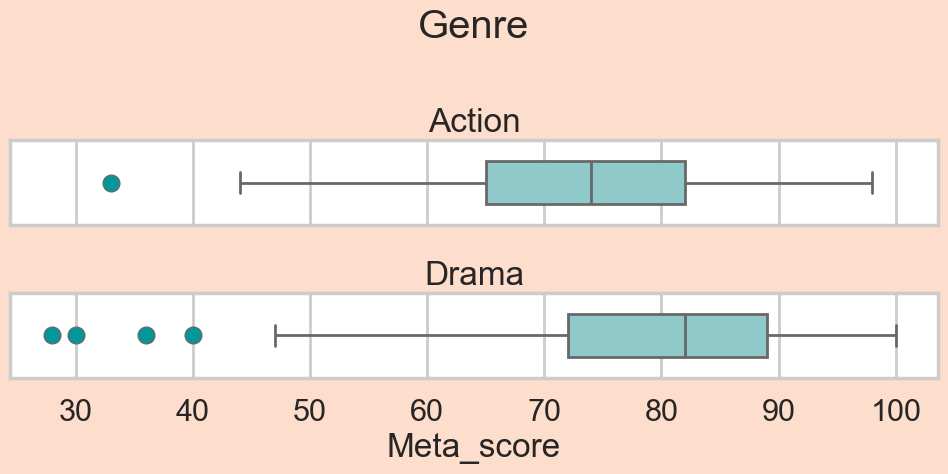

In [15]:
sns.set_style('whitegrid')
sns.set_context('poster')
fig, ax = plt.subplots(2, 1, figsize=(10, 5), sharex=True, facecolor='#fdddcb')

sns.boxplot(df_filtered_action, ax=ax[0], color='#87d2d2', orient='y', linewidth=2, width=0.5,
            flierprops={'marker': 'o', 'markerfacecolor': '#009999'})
ax[0].set_title('Action')
sns.boxplot(df_filtered_drama, ax=ax[1], color='#87d2d2', orient='y', linewidth=2, width=0.5,
            flierprops={'marker': 'o', 'markerfacecolor': '#009999'})
ax[1].set_title('Drama')
plt.suptitle('Genre')
plt.tight_layout()
plt.show()

In [16]:
z_krit = norm.ppf(1 - ALPHA)
x_anfang = mean_stichprobe_drama - 5 * std_fehler_drama
x_ende = mean_stichprobe_drama + 5 * std_fehler_drama
untere_grenze = mean_stichprobe_drama - z_krit * std_fehler_drama

print(f"kritscher Z-Wert: {z_krit:.2f}\nx-Anfang: {x_anfang:.2f}\nx-Ende: {x_ende:.2f}\nuntere Grenze: {untere_grenze:.2f}")

kritscher Z-Wert: 1.64
x-Anfang: 70.82
x-Ende: 87.72
untere Grenze: 76.49


In [17]:
x_werte = np.linspace(x_anfang, x_ende, 1000)
y_werte = norm.pdf(x_werte, mean_stichprobe_drama, std_fehler_drama)

print(f"x-Werte: {x_werte[:5]}\ny-Werte: {y_werte[:5]}")

x-Werte: [70.82461382 70.84152471 70.85843561 70.8753465  70.89225739]
y-Werte: [8.80029051e-07 9.25149058e-07 9.72484968e-07 1.02214043e-06
 1.07422367e-06]


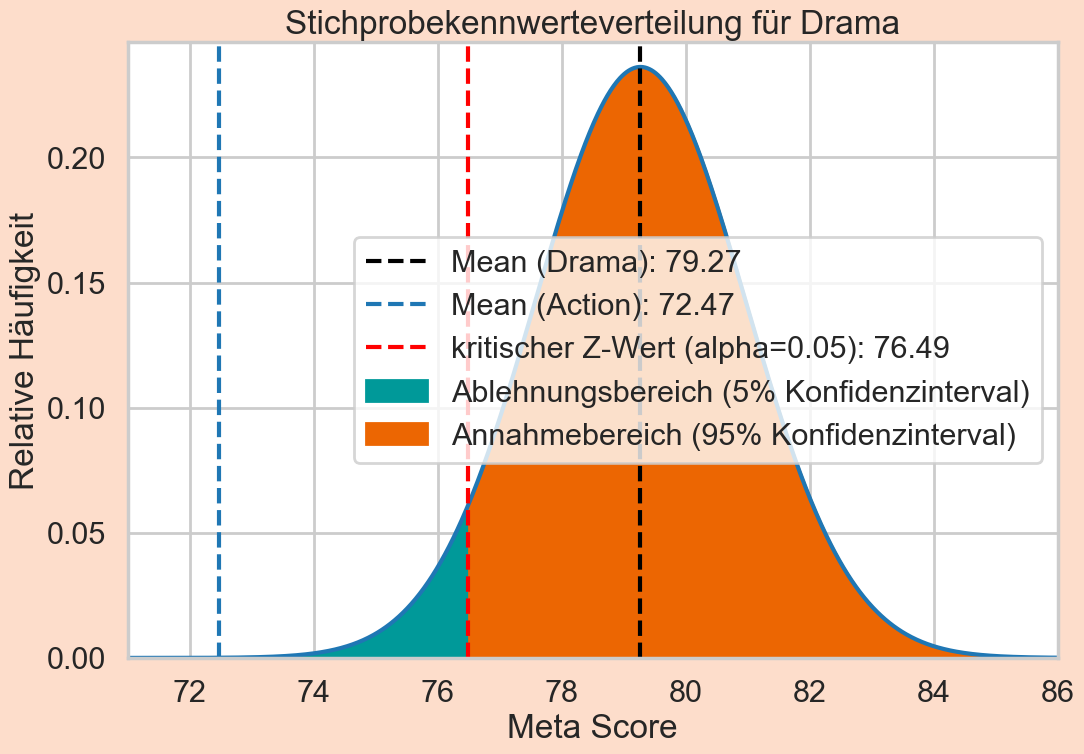

In [18]:
sns.set_style('whitegrid')
sns.set_context('poster')

plt.figure(figsize=(12, 8), facecolor='#fdddcb')
plt.plot(x_werte, y_werte)
plt.axvline(x=mean_stichprobe_drama, color='black', label=f"Mean (Drama): {mean_stichprobe_drama:.2f}", linestyle='--')
plt.axvline(x=mean_stichprobe_action, label=f"Mean (Action): {mean_stichprobe_action:.2f}", linestyle='--')
plt.axvline(x=untere_grenze, color='r', label=f"kritischer Z-Wert (alpha={ALPHA}): {untere_grenze:.2f}", linestyle='--')
plt.fill_between(x_werte, y_werte, where=x_werte < untere_grenze, color='#009999', 
                 label='Ablehnungsbereich (5% Konfidenzinterval)')
plt.fill_between(x_werte, y_werte, where=x_werte > untere_grenze, color='#EC6602', 
                 label='Annahmebereich (95% Konfidenzinterval)')
plt.ylim(0, max(y_werte) + 0.01)
plt.title('Stichprobekennwerteverteilung für Drama')
plt.xlabel('Meta Score')
plt.ylabel('Relative Häufigkeit')
plt.xlim(71, 86)
plt.legend()
plt.show()